In [1]:
import os
import pandas as pd
import dandelion as ddl
ddl.logging.print_header()

dandelion==0.3.1 pandas==1.5.3 numpy==1.23.5 matplotlib==3.5.3 networkx==3.1 scipy==1.10.1


In [3]:
# change directory to somewhere more workable
os.chdir(os.path.expanduser('/SGRNJ06/randd/USER/cjj/celedev/dandelion/singularity/dandelion_tutorial'))
# I'm importing scanpy here to make use of its logging module.
import scanpy as sc
sc.settings.verbosity = 3
import warnings
warnings.filterwarnings('ignore')
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.6 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [11]:
adata = sc.read_h5ad('demo-gex-processed.h5ad')
vdj = ddl.read_h5('demo-vdj-processed.h5ddl')
vdj

Dandelion class object with n_obs = 3092 and n_contigs = 7357
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [12]:
ddl.tl.transfer(adata, vdj) # this will include singletons.
adata

Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:26)


AnnData object with n_obs × n_vars = 30471 × 1344
    obs: 'sampleid', 'batch', 'leiden', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ', 'clone_id', 'clone_id_by_size', 'clone_id_size', 'clone_id_size_max_3'
   

In [13]:
adata2 = adata.copy()
ddl.tl.transfer(adata2, vdj, expanded_only=True)
adata2

Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:33)


AnnData object with n_obs × n_vars = 30471 × 1344
    obs: 'sampleid', 'batch', 'leiden', 'has_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ', 'clone_id', 'clone_id_by_size', 'clone_id_size', 'clone_id_size_max_3'
   

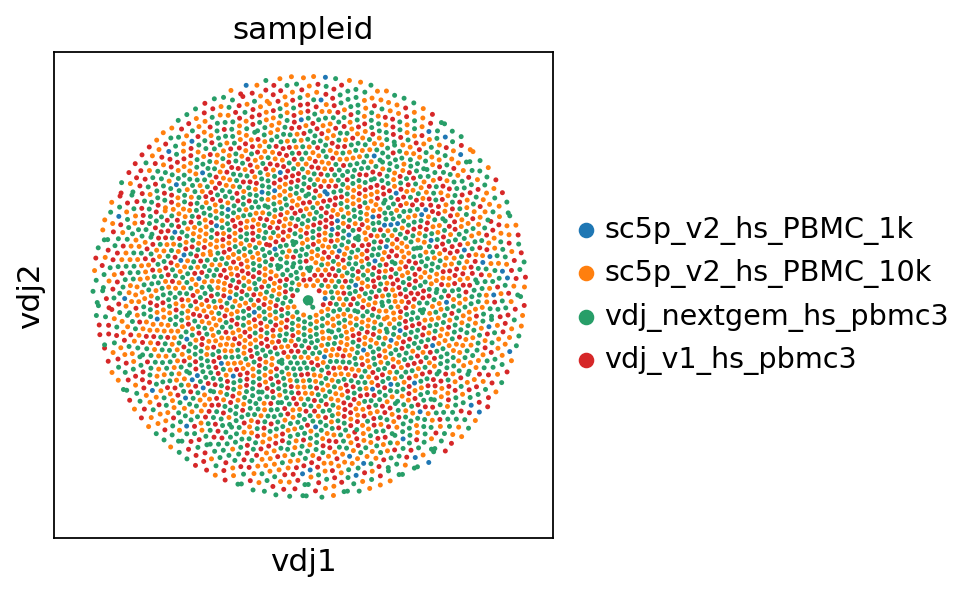

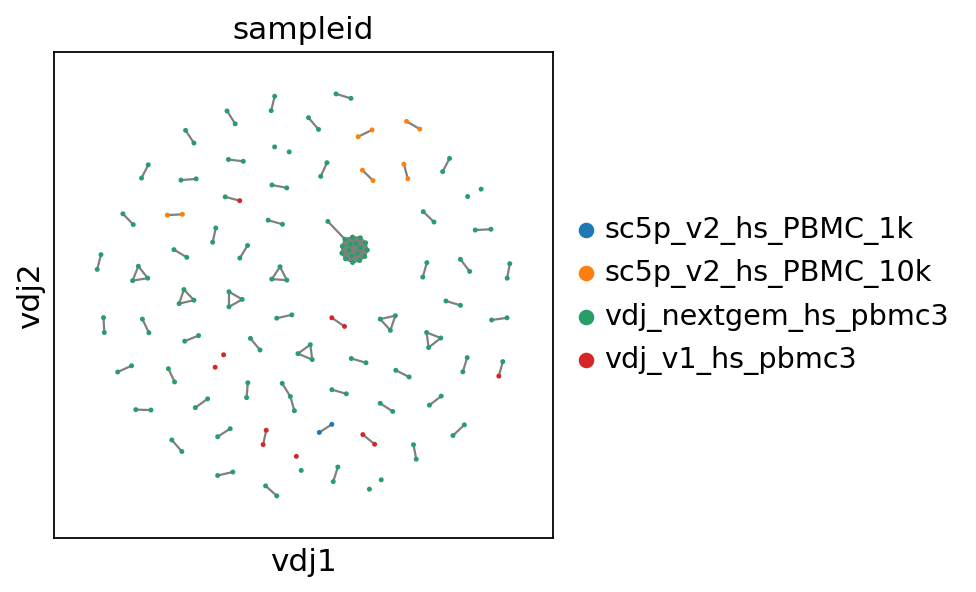

In [14]:
sc.set_figure_params(figsize = [4,4])
ddl.pl.clone_network(adata,
                     color = ['sampleid'],
                     edges_width = 1,
                     size = 20)
# show where clones/clonotypes have more than 1 cell
ddl.pl.clone_network(adata2,
                     color = ['sampleid'],
                     edges_width = 1,
                     size = 20)

Generating network


Setting up data: 6238it [00:02, 2217.85it/s]
Linking edges : 100%|██████████| 2732/2732 [00:00<00:00, 12907.15it/s]                                                                                 

generating network layout


 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:01:14)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:23)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:21)


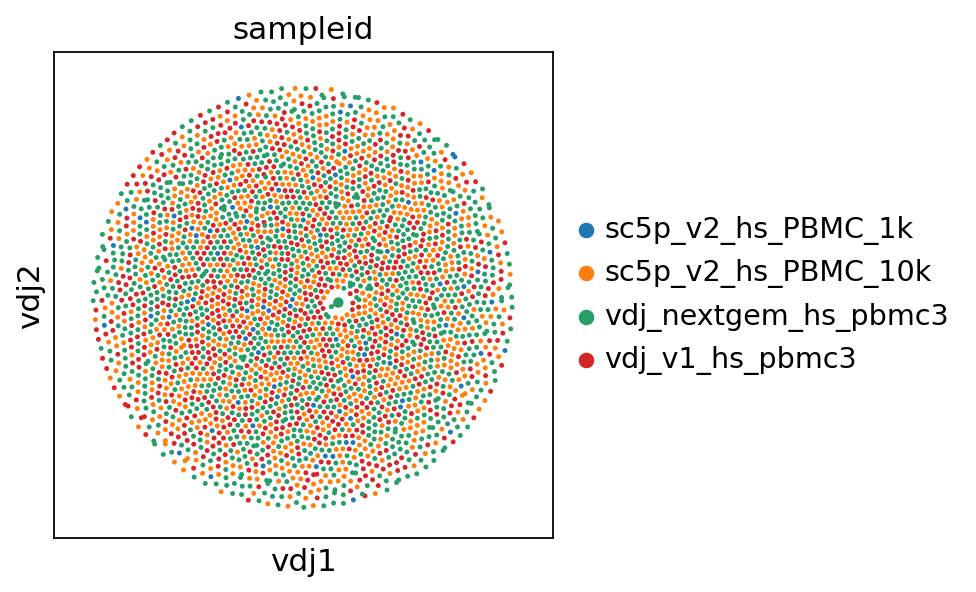

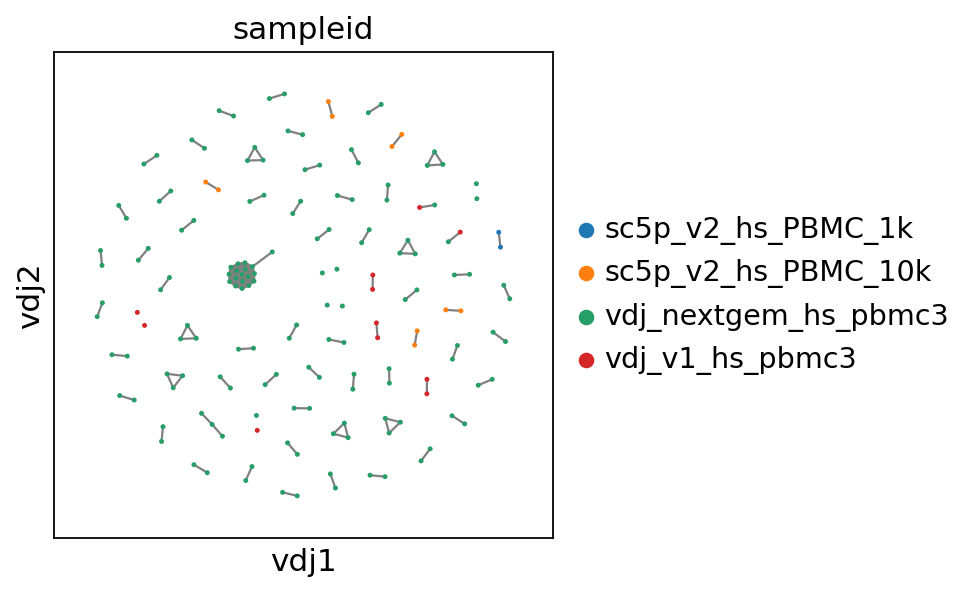

In [20]:
# making a copy of both adata and vdj
vdj3 = vdj.copy()
adata3 = adata.copy()
# recompute layout with original method
ddl.tl.generate_network(vdj3)
ddl.tl.transfer(adata3, vdj3)
# also for > 1 cells
adata4 = adata3.copy()
ddl.tl.transfer(adata4, vdj3, expanded_only = True)
# visualise
ddl.pl.clone_network(adata3,
                     color = ['sampleid'],
                     edges_width = 1,
                     size = 20)
# show where clones/clonotypes have more than 1 cell
ddl.pl.clone_network(adata4,
                     color = ['sampleid'],
                     edges_width = 1,
                     size = 20)

Generating network


Setting up data: 6238it [00:02, 2502.86it/s]
Linking edges : 100%|██████████| 2732/2732 [00:00<00:00, 12184.43it/s]                                                                                 

generating network layout


 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:01:24)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:22)


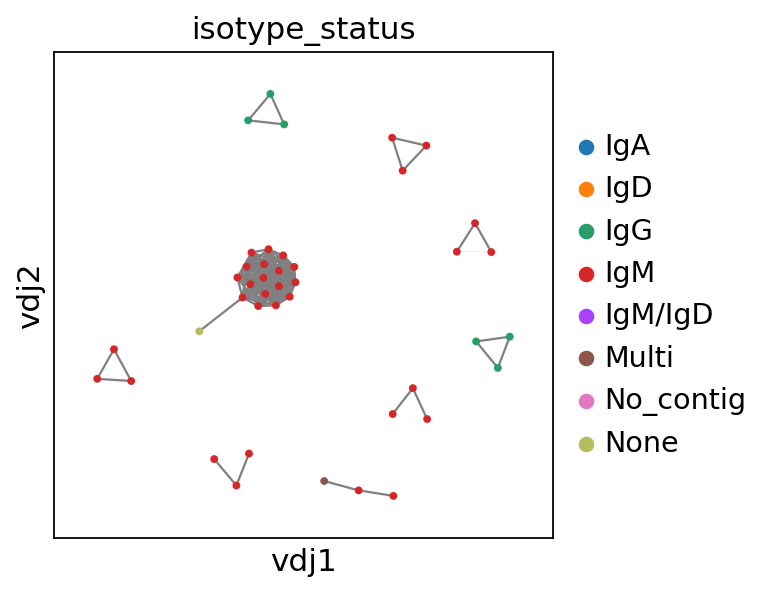

In [17]:
# To illustrate this, first recompute the graph by specifying a minimum size
vdjx = vdj.copy()
adatax = adata.copy()
ddl.tl.generate_network(vdjx, min_size = 3) # second graph will only contain clones/clonotypes with >= 3 cells
ddl.tl.transfer(adatax, vdjx, expanded_only = True)

edgeweights = [1/(e+1) for e in ddl.tl.extract_edge_weights(vdjx)] # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
# therefore, the thicker the line, the shorter the edit distance.
ddl.pl.clone_network(adatax,
                     color = ['isotype_status'],
                     legend_fontoutline=3,
                     edges_width = edgeweights,
                     size = 50
                    )

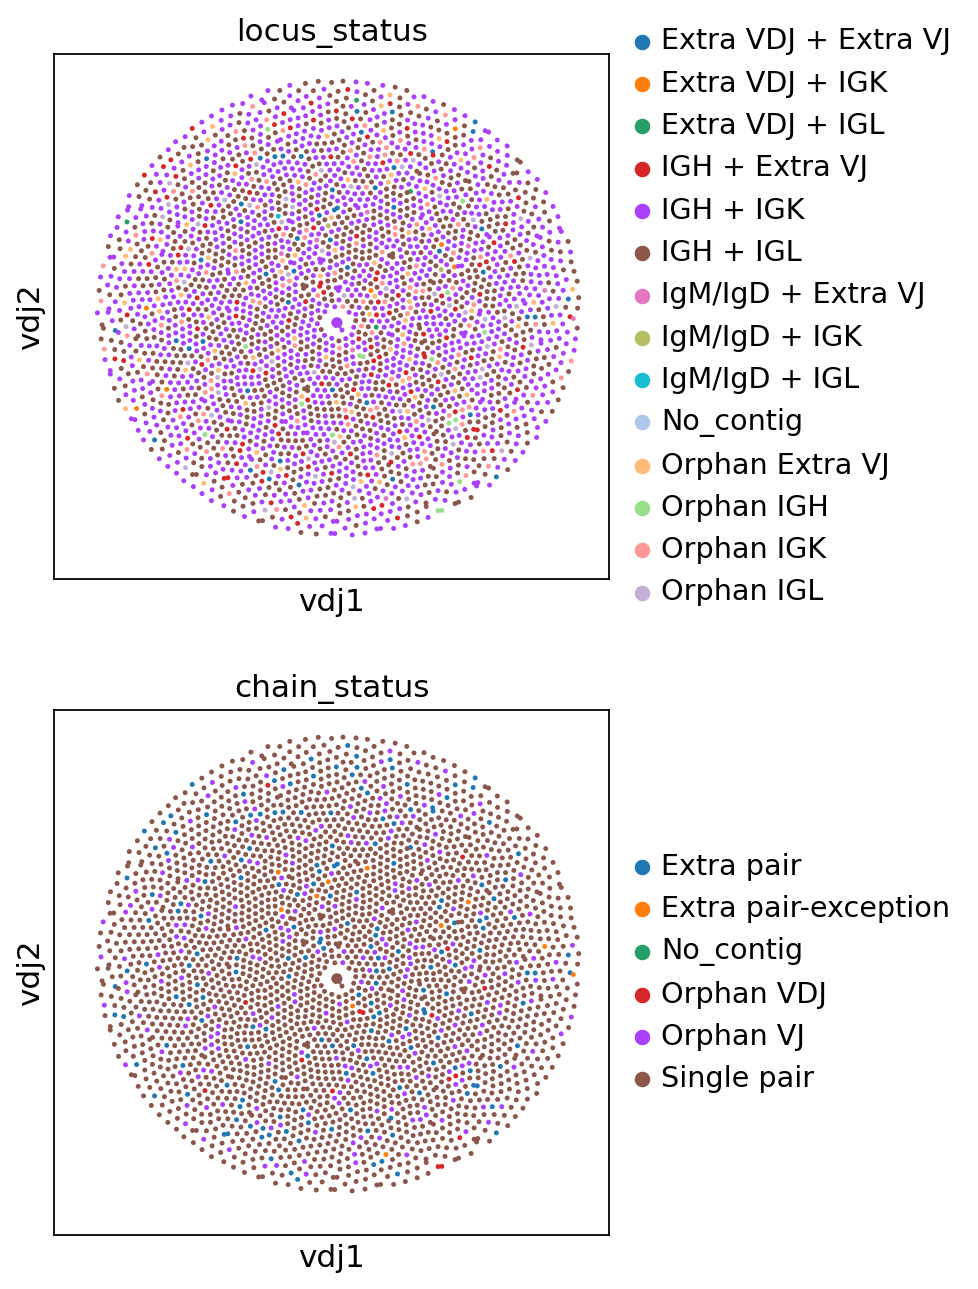

In [21]:
sc.set_figure_params(figsize = [4,4.5])
ddl.pl.clone_network(adata,
                     color = ['locus_status', 'chain_status'],
                     ncols = 1,
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)

In [22]:
adata.write('/SGRNJ06/randd/USER/cjj/celedev/dandelion/test/visualizing_vdj/adata.h5ad', compression = 'gzip')

In [23]:
ddl.tl.clone_size(vdj)
ddl.tl.transfer(adata, vdj)

Quantifying clone sizes
 finished: Updated Dandelion object: 
   'metadata', cell-indexed clone table (0:00:00)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:26)


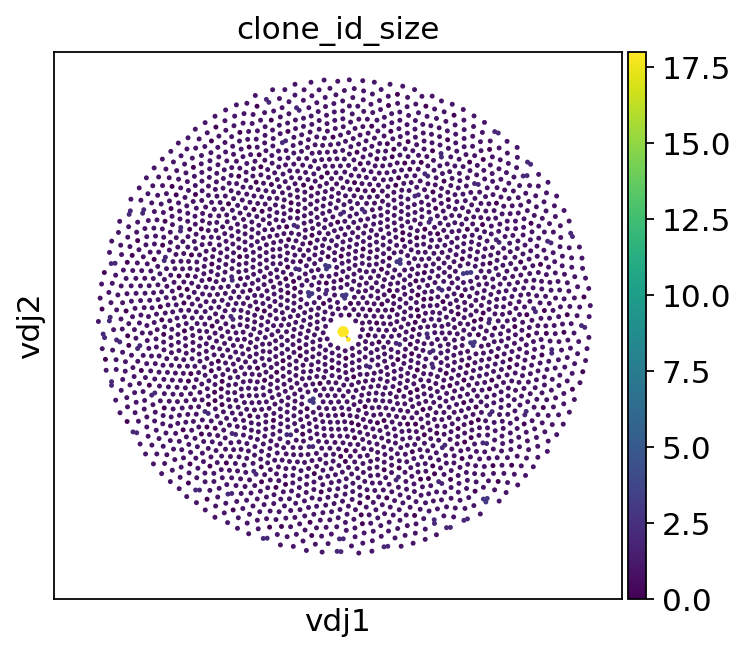

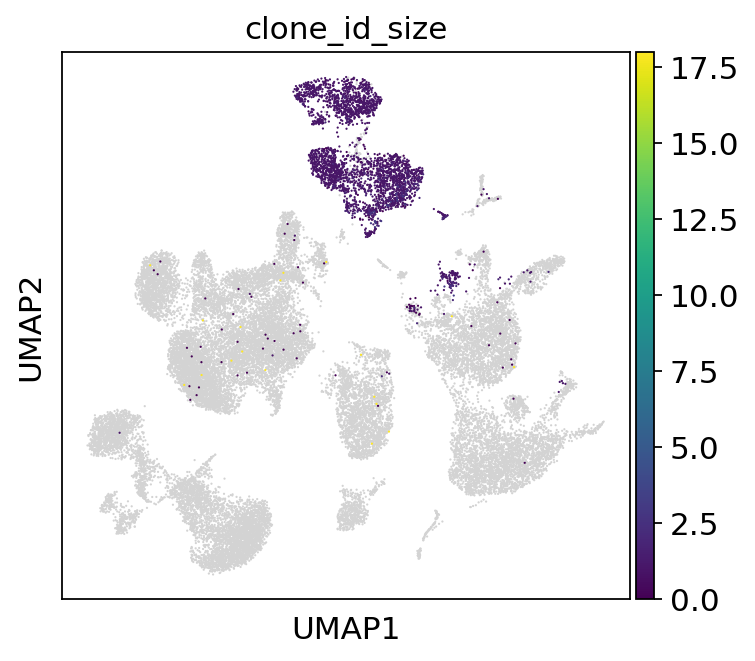

In [24]:
sc.set_figure_params(figsize = [5,4.5])
ddl.pl.clone_network(adata,
                     color = ['clone_id_size'],
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20,
                     color_map = 'viridis'
                    )
sc.pl.umap(adata, color = ['clone_id_size'], color_map = 'viridis')

In [25]:
ddl.tl.clone_size(vdj, max_size = 3)
ddl.tl.transfer(adata, vdj)

Quantifying clone sizes
 finished: Updated Dandelion object: 
   'metadata', cell-indexed clone table (0:00:00)
Transferring network
converting matrices
Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:28)


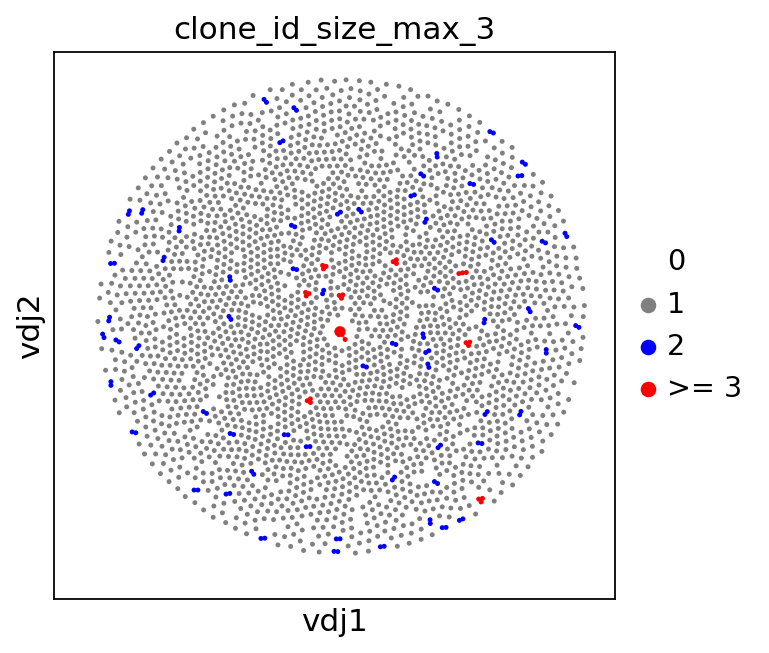

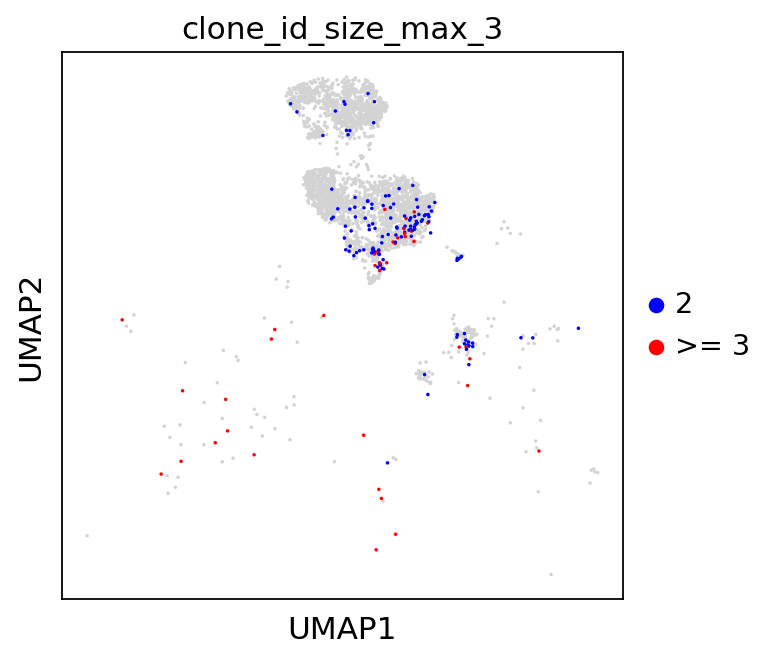

In [26]:
sc.set_figure_params(figsize = [4.5,4.5])
ddl.pl.clone_network(adata,
                     color = ['clone_id_size_max_3'],
                     ncols = 2,
                     legend_fontoutline=3,
                     edges_width = 1,
                     palette = ['white', 'grey', 'blue', 'red'],
                     size = 20,
                     na_in_legend=False,
                    )
sc.pl.umap(adata[adata.obs['has_contig'] == 'True'],
           color = ['clone_id_size_max_3'], groups = ['2', ">= 3"], size = 10, na_in_legend=False)

(<Figure size 800x300 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='proportion'>)

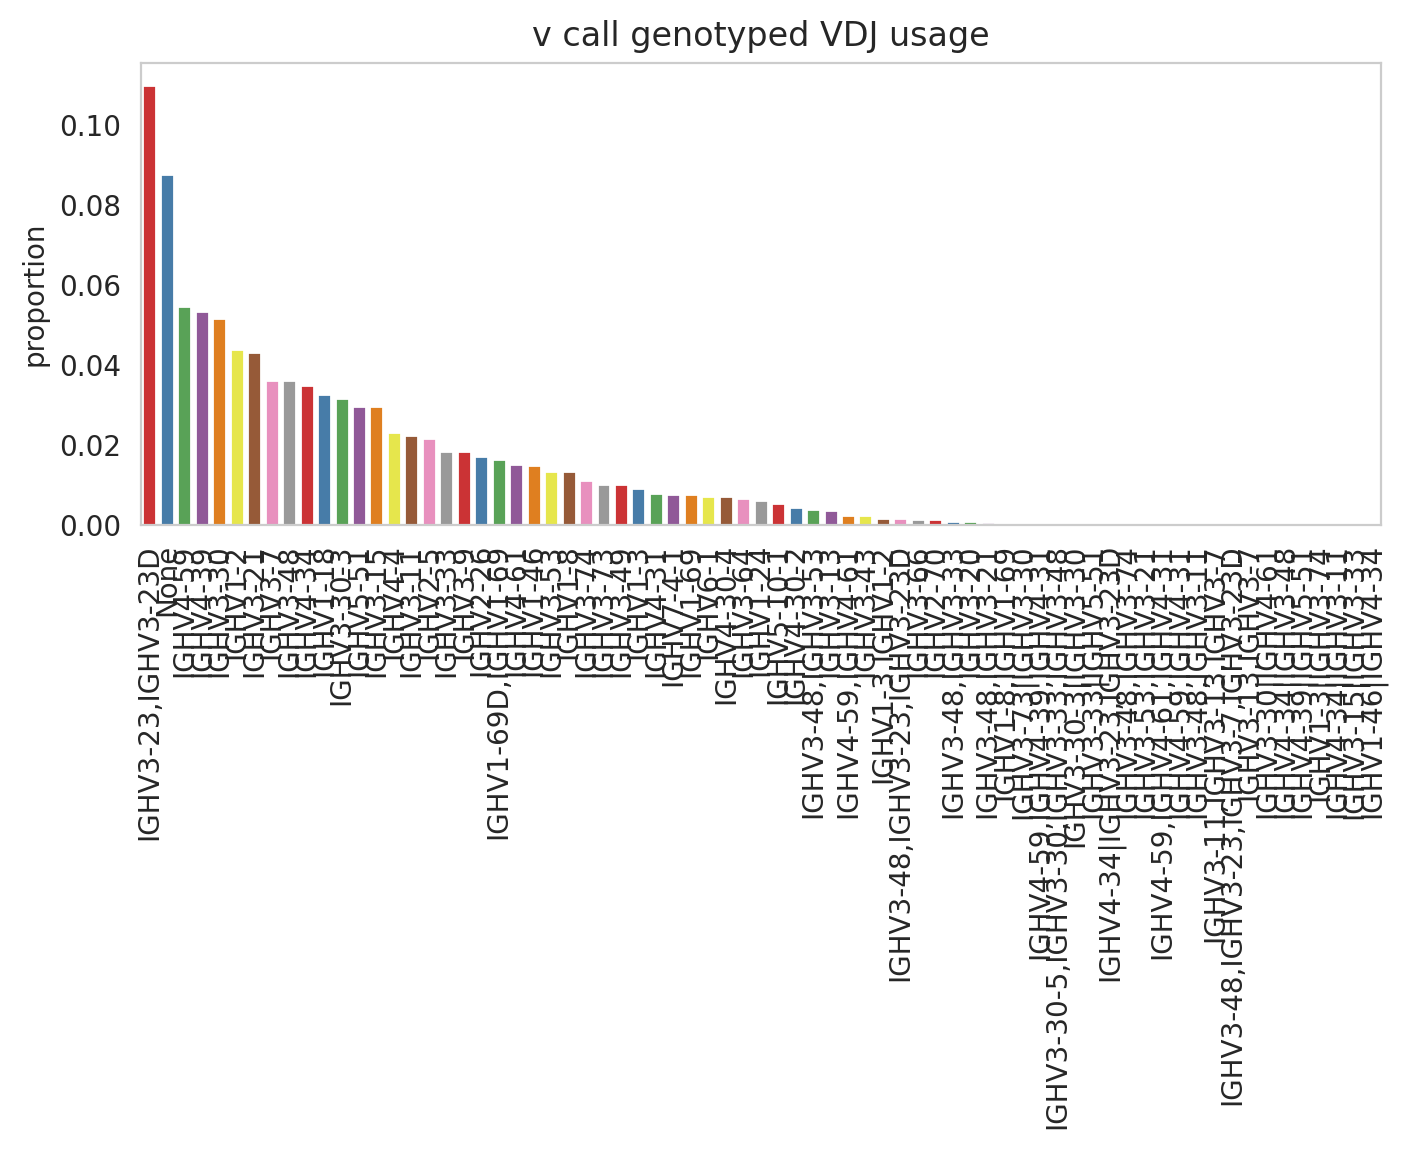

In [27]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
ddl.pl.barplot(vdj[vdj.metadata.isotype_status != 'Multi'], # remove multi from the plots
               color = 'v_call_genotyped_VDJ')

(<Figure size 800x300 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='proportion'>)

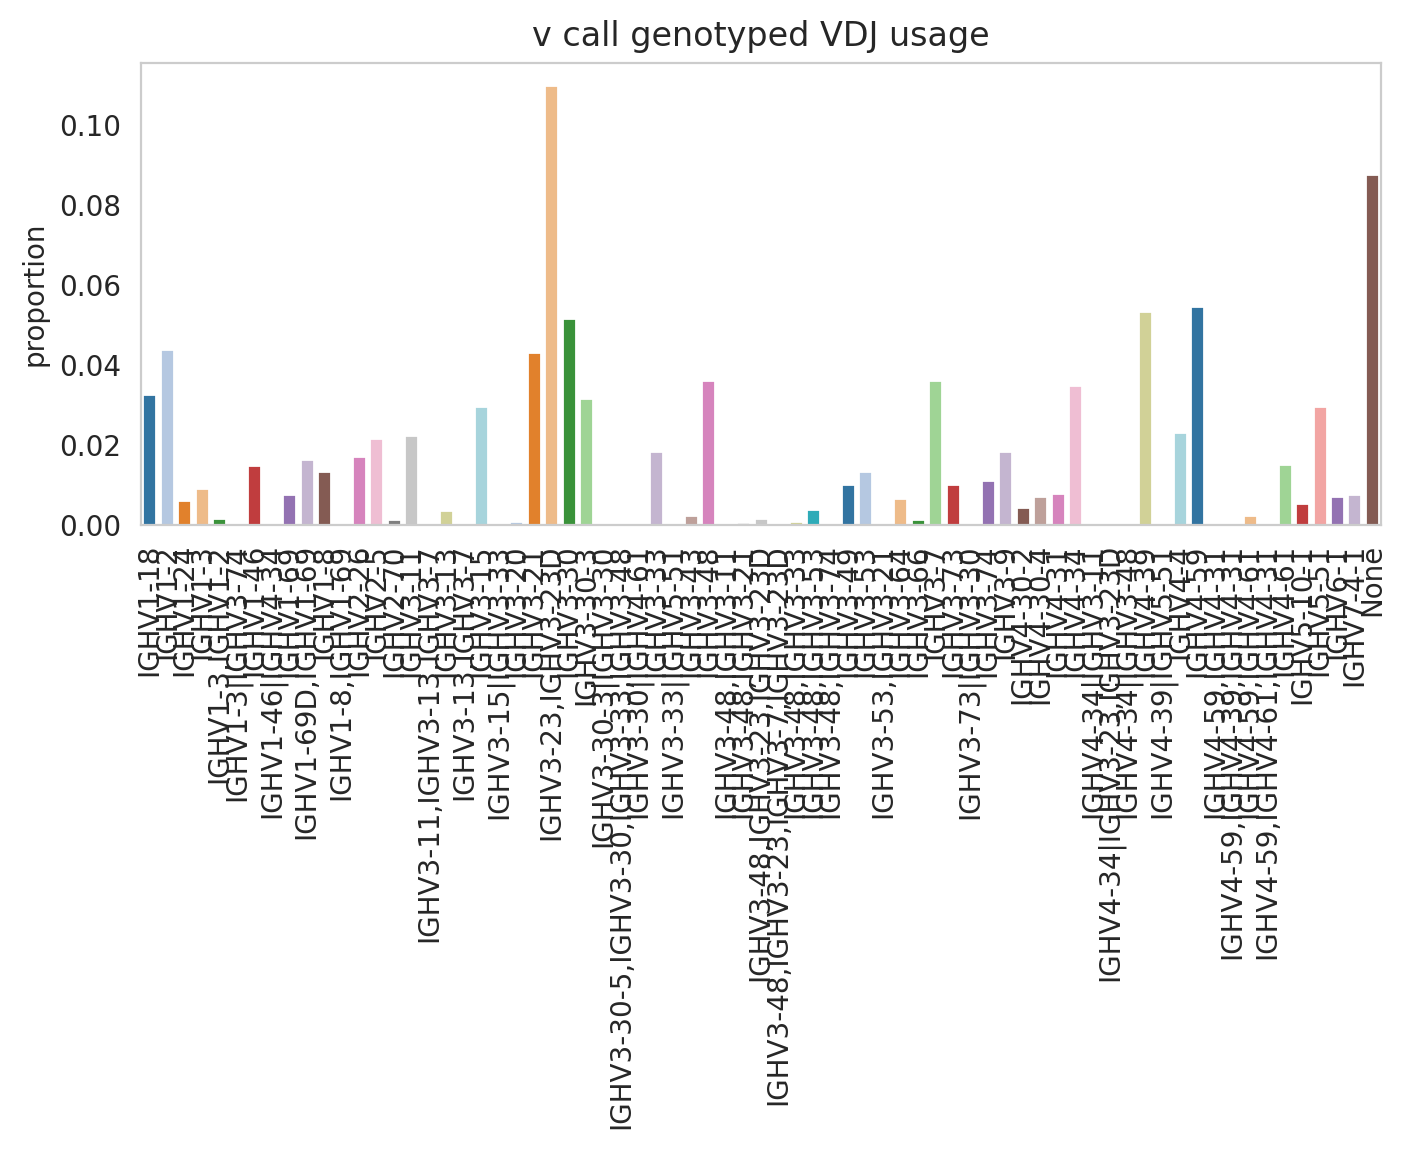

In [28]:
ddl.pl.barplot(vdj[vdj.metadata.isotype_status != 'Multi'],
               color = 'v_call_genotyped_VDJ',
               sort_descending = None,
               palette = 'tab20'
              )

(<Figure size 800x300 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='count'>)

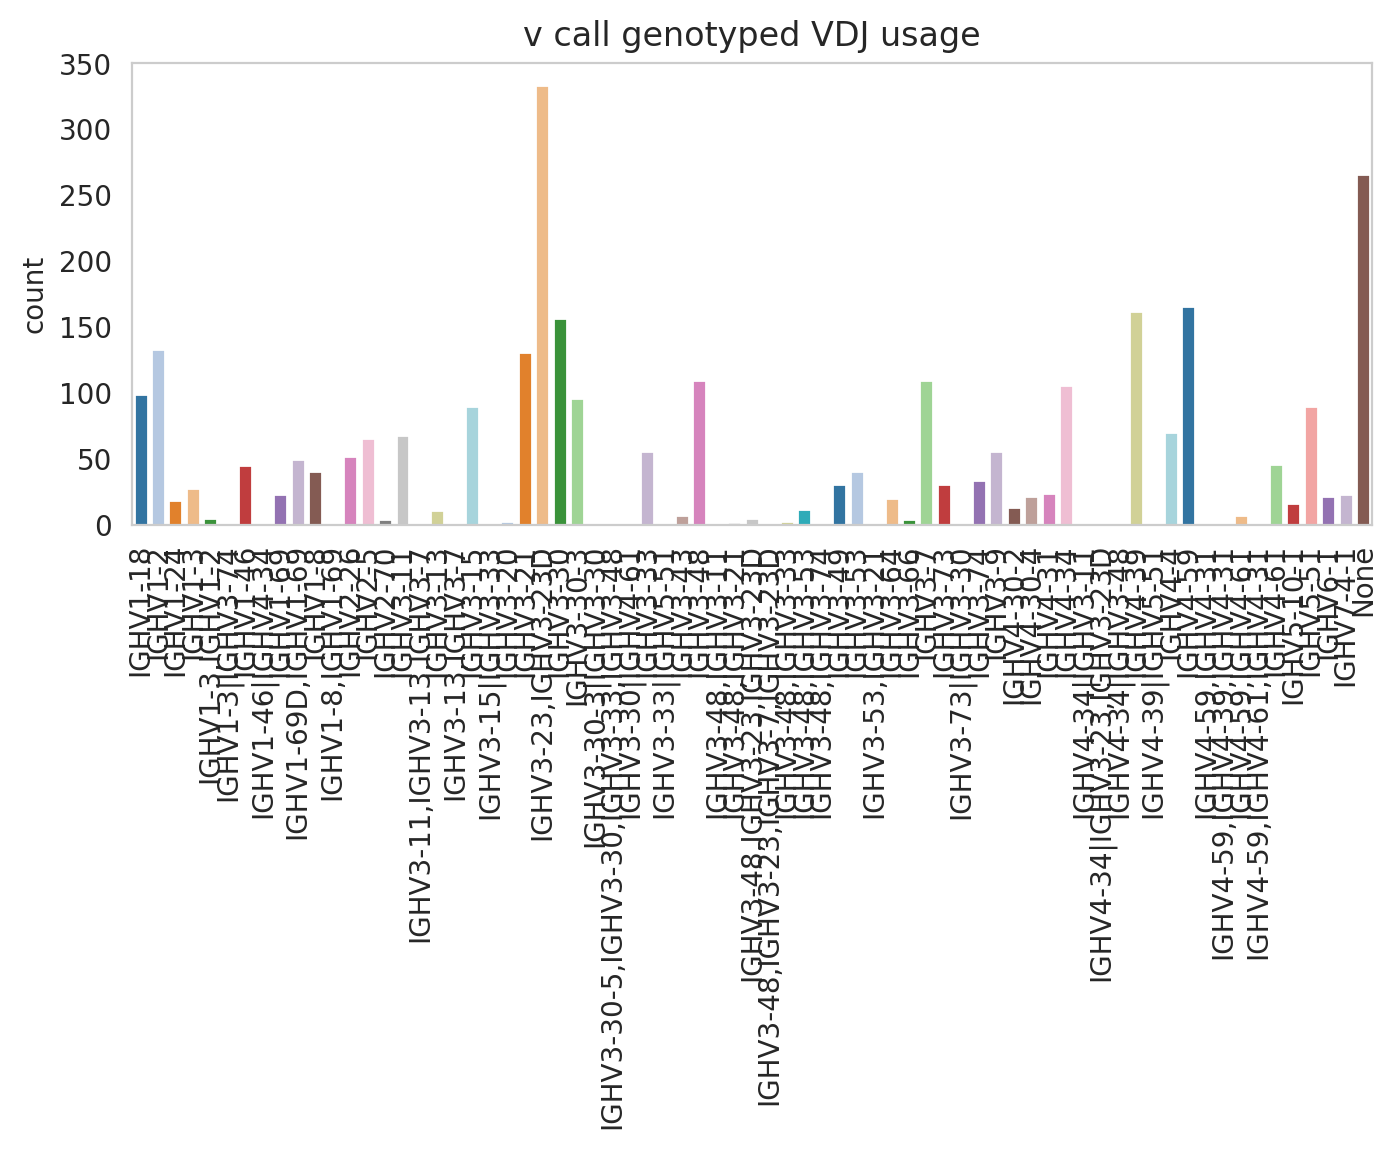

In [29]:
ddl.pl.barplot(vdj[vdj.metadata.isotype_status != 'Multi'],
               color = 'v_call_genotyped_VDJ',
               normalize = False,
               sort_descending = None,
               palette = 'tab20'
              )

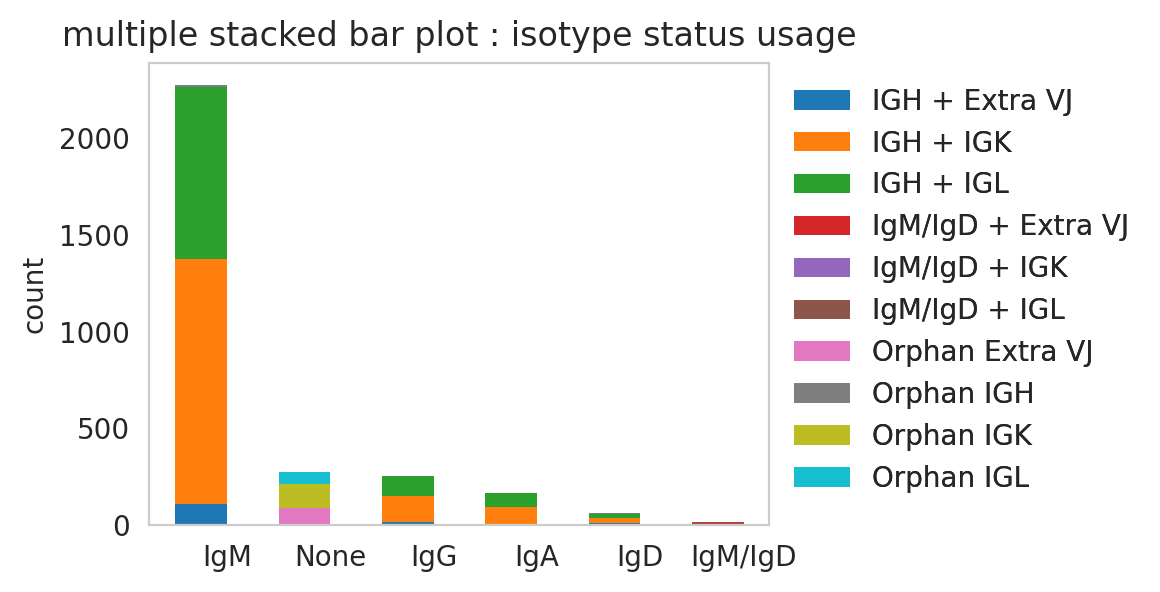

In [30]:
import matplotlib.pyplot as plt
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'isotype_status',
                      groupby = 'locus_status',
                      xtick_rotation =0,
                      figsize = (4,3))
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

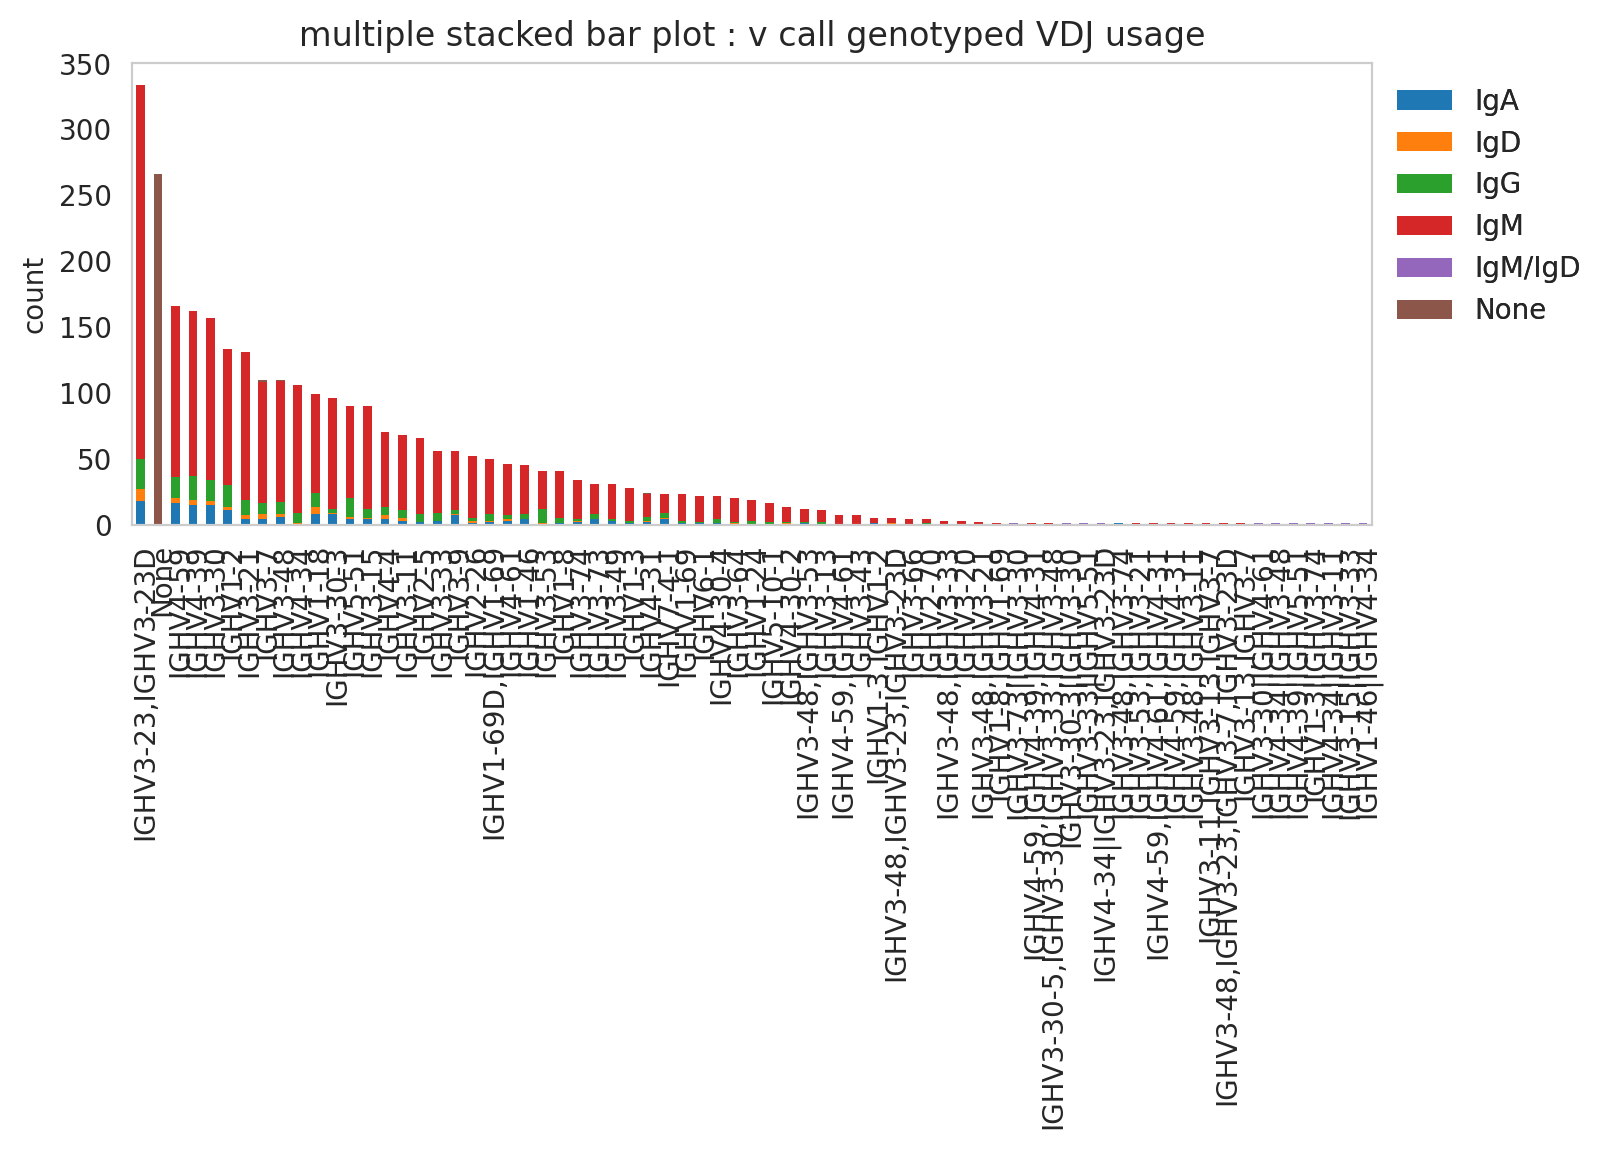

In [31]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'v_call_genotyped_VDJ',
                      groupby = 'isotype_status',
                     )
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

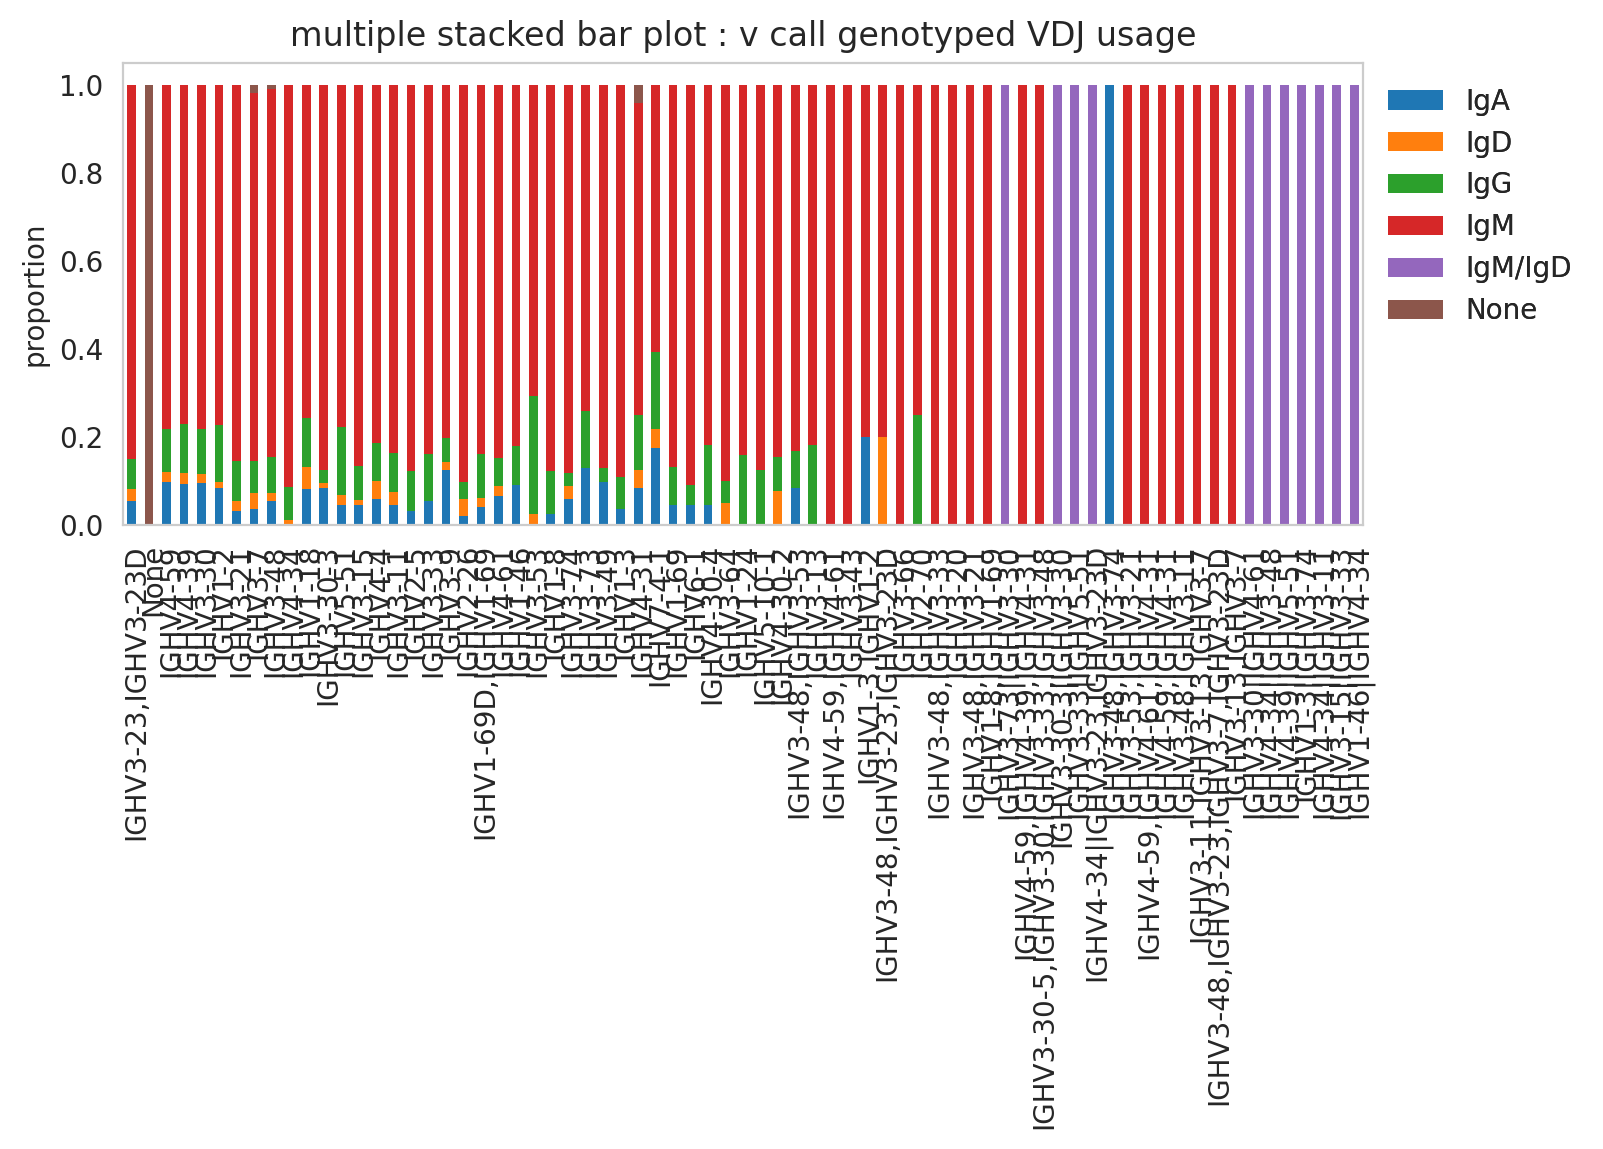

In [32]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'v_call_genotyped_VDJ',
                      groupby = 'isotype_status',
                      normalize = True,
                     )
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

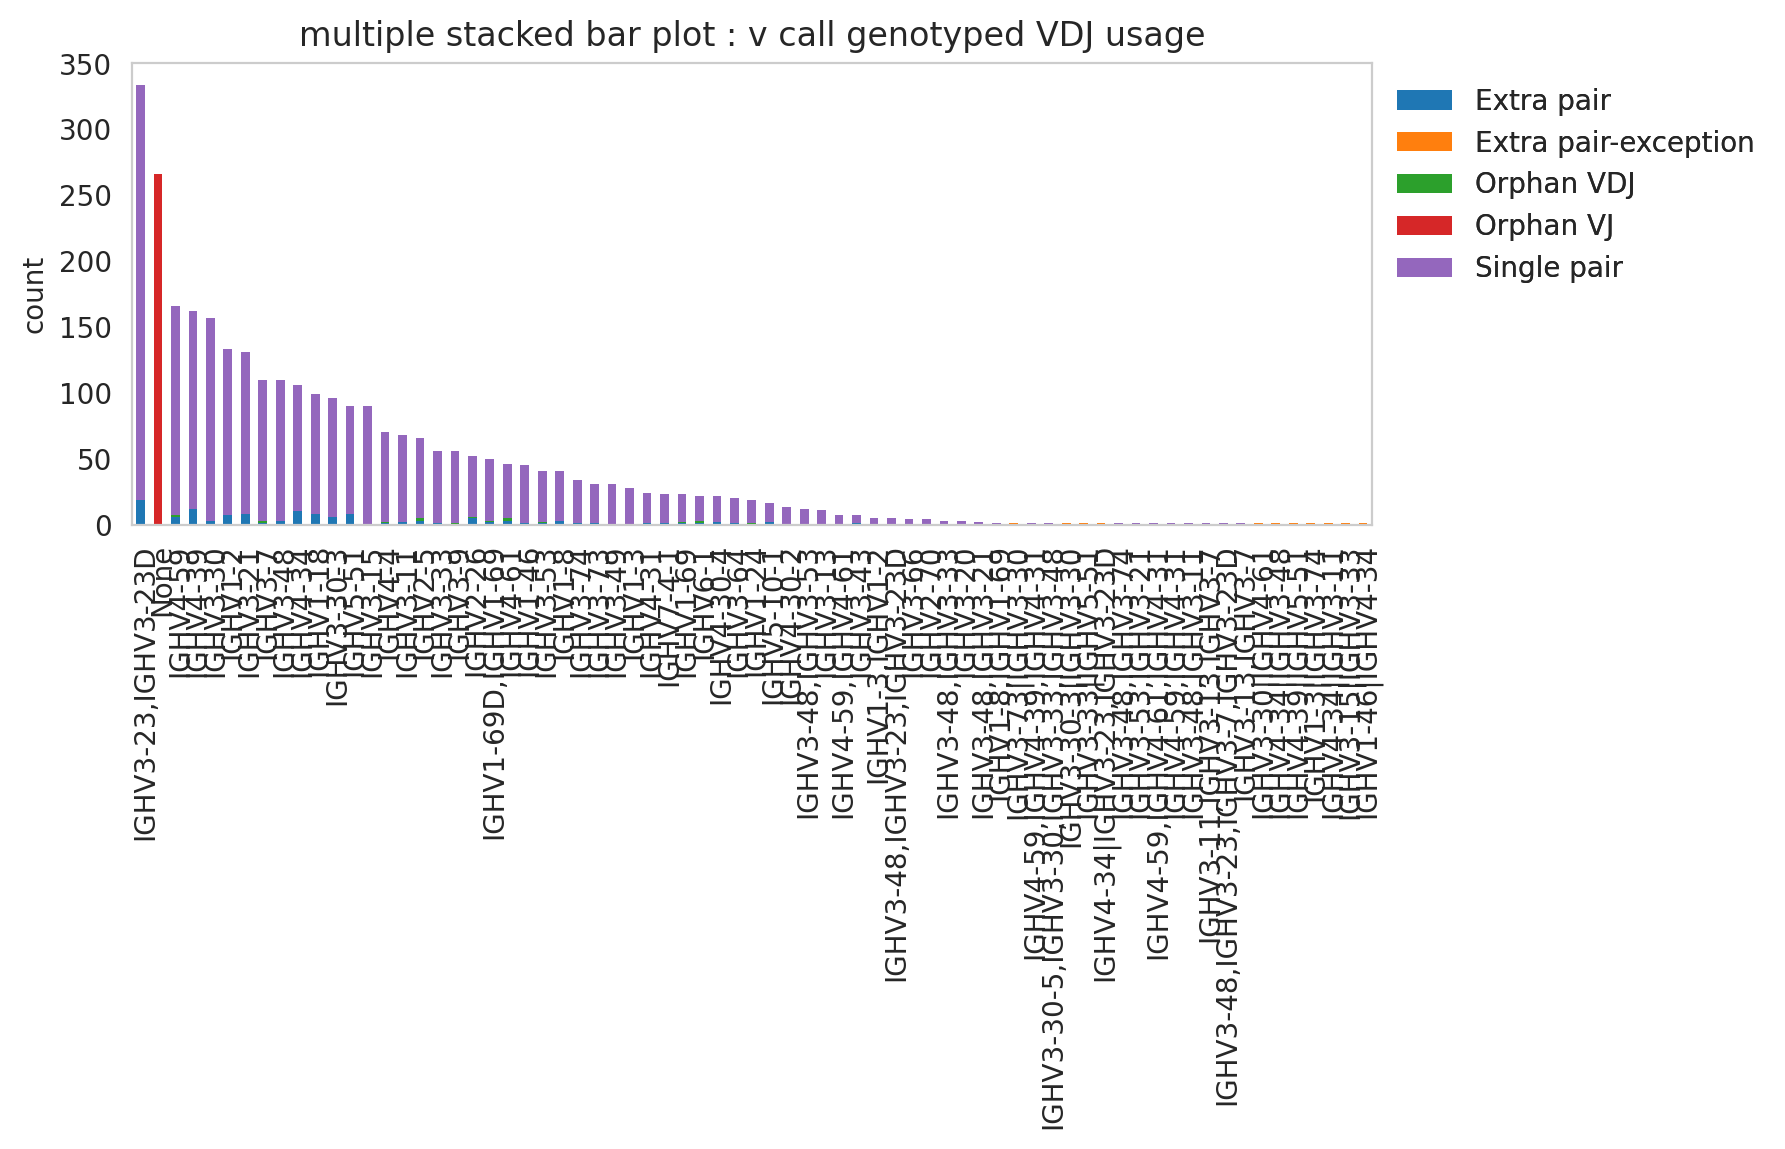

In [33]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'v_call_genotyped_VDJ',
                      groupby = 'chain_status',
                     )
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

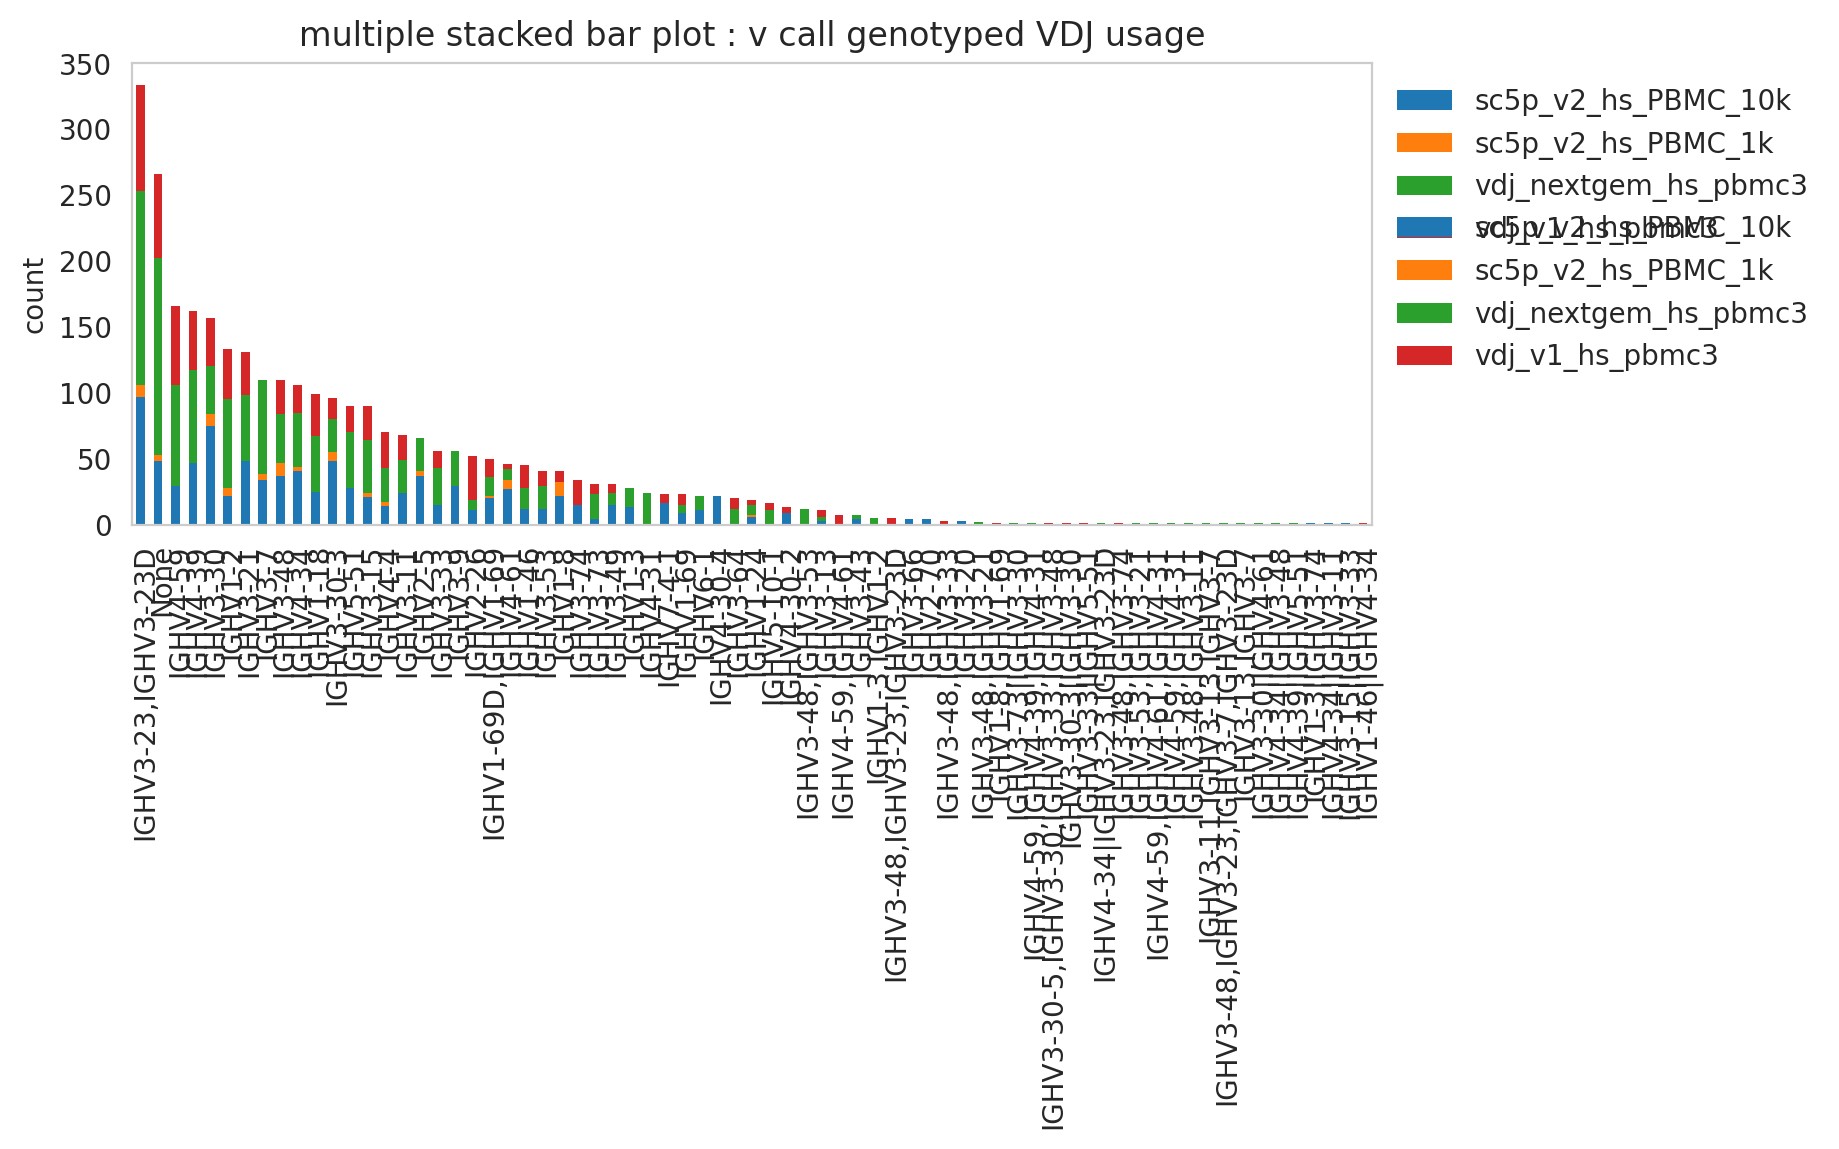

In [34]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'v_call_genotyped_VDJ',
                      groupby = 'sample_id',
                     )
plt.legend(bbox_to_anchor = (1, 0.5),
           loc='center left',
           frameon=False)

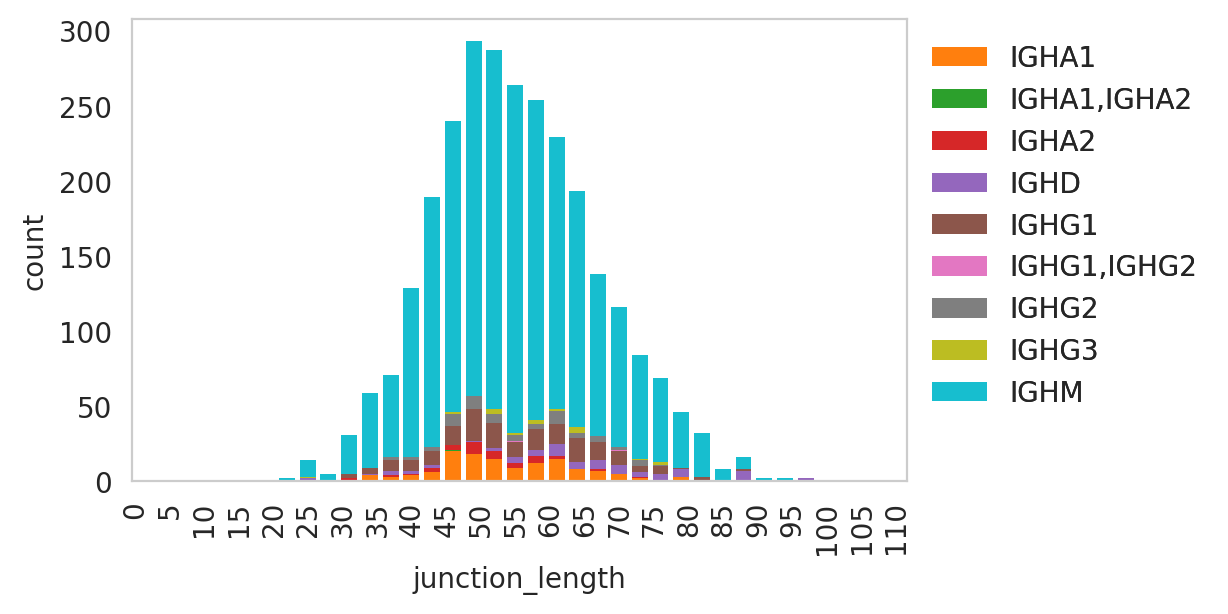

In [35]:
ddl.pl.spectratype(vdj[vdj.metadata.isotype_status != 'Multi'],
                   color = 'junction_length',
                   groupby = 'c_call',
                   locus='IGH',
                   width = 2.3)
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

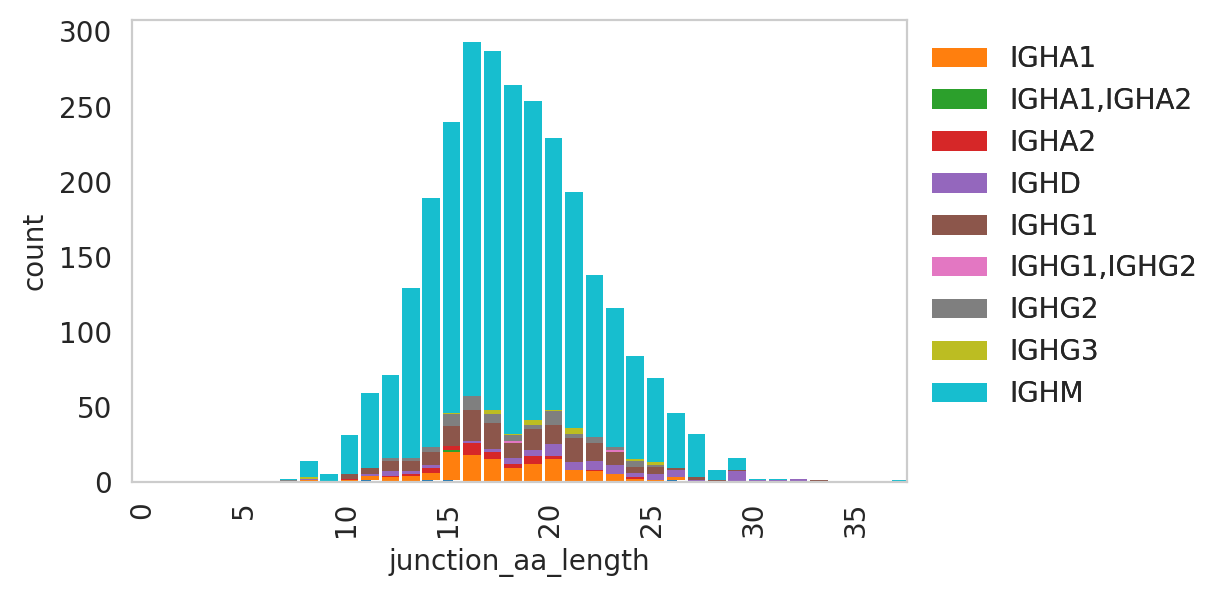

In [36]:
ddl.pl.spectratype(vdj[vdj.metadata.isotype_status != 'Multi'],
                   color = 'junction_aa_length',
                   groupby = 'c_call',
                   locus='IGH')
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

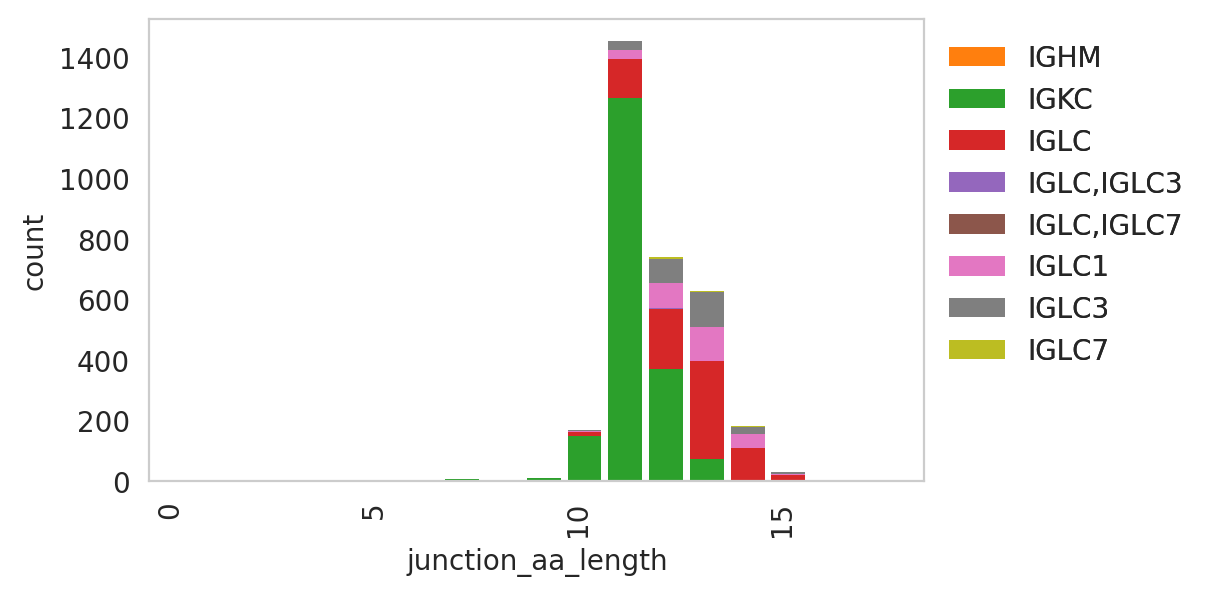

In [37]:
ddl.pl.spectratype(vdj[vdj.metadata.isotype_status != 'Multi'],
                   color = 'junction_aa_length',
                   groupby = 'c_call',
                   locus=['IGK','IGL'])
plt.legend(bbox_to_anchor = (1,1),
           loc='upper left',
           frameon=False)

In [38]:
ddl.tl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden')

Finding clones
 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


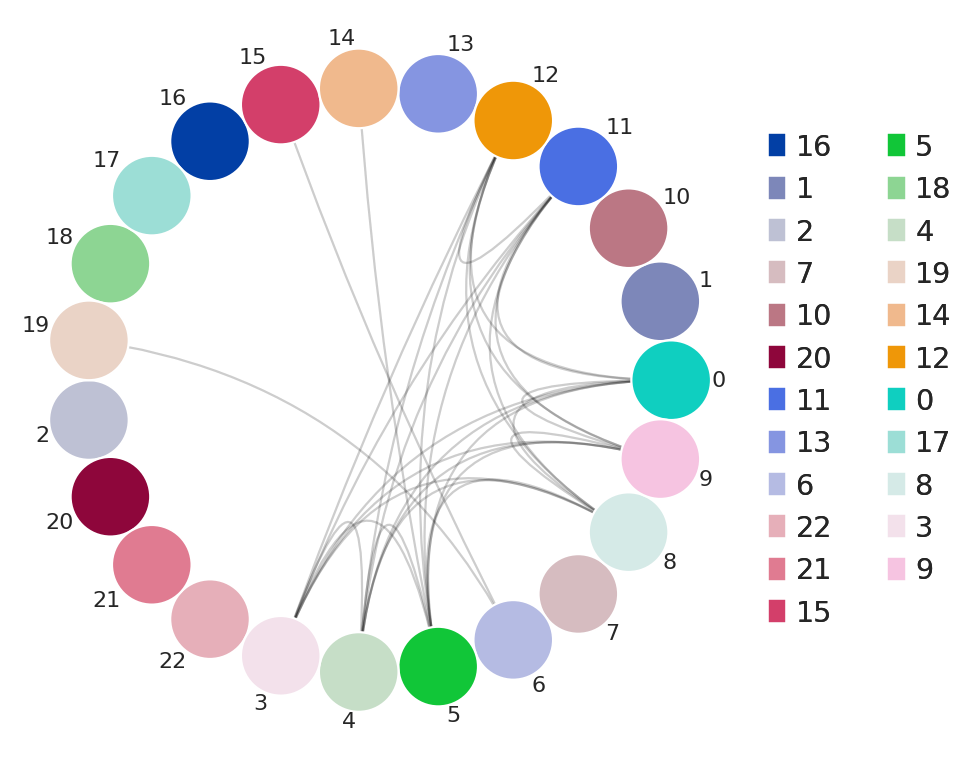

In [39]:
sc.set_figure_params(figsize = [6,6])
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden')

Finding clones
 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


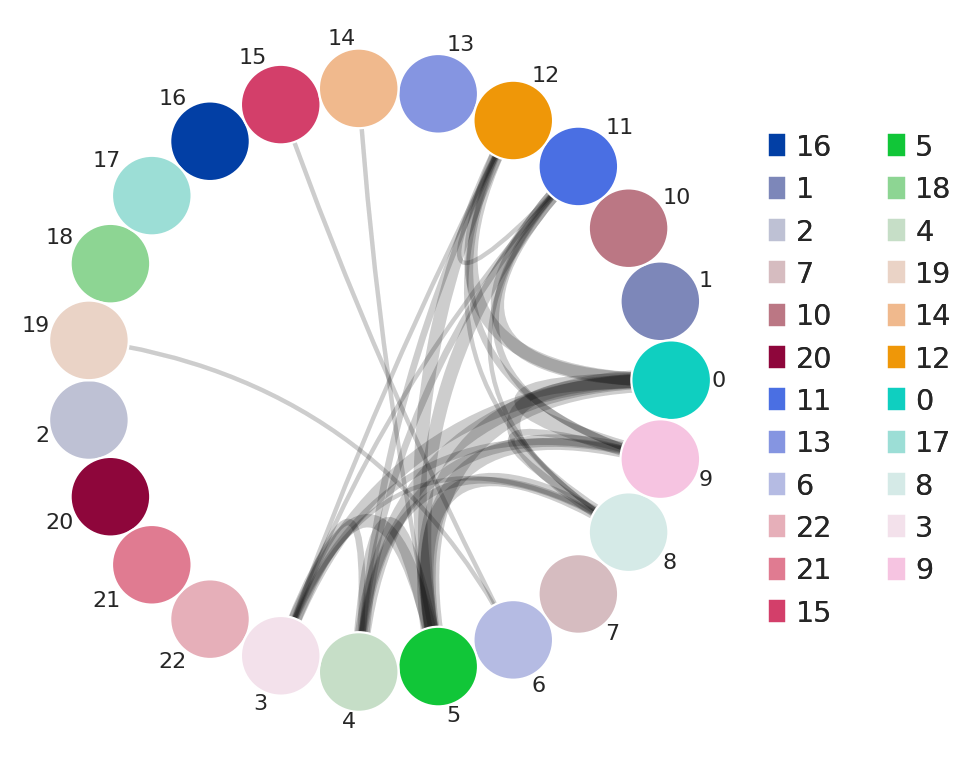

In [40]:
ddl.tl.clone_overlap(adata,groupby = 'leiden',
                     colorby = 'leiden', weighted_overlap = True)
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden',
                     weighted_overlap = True)

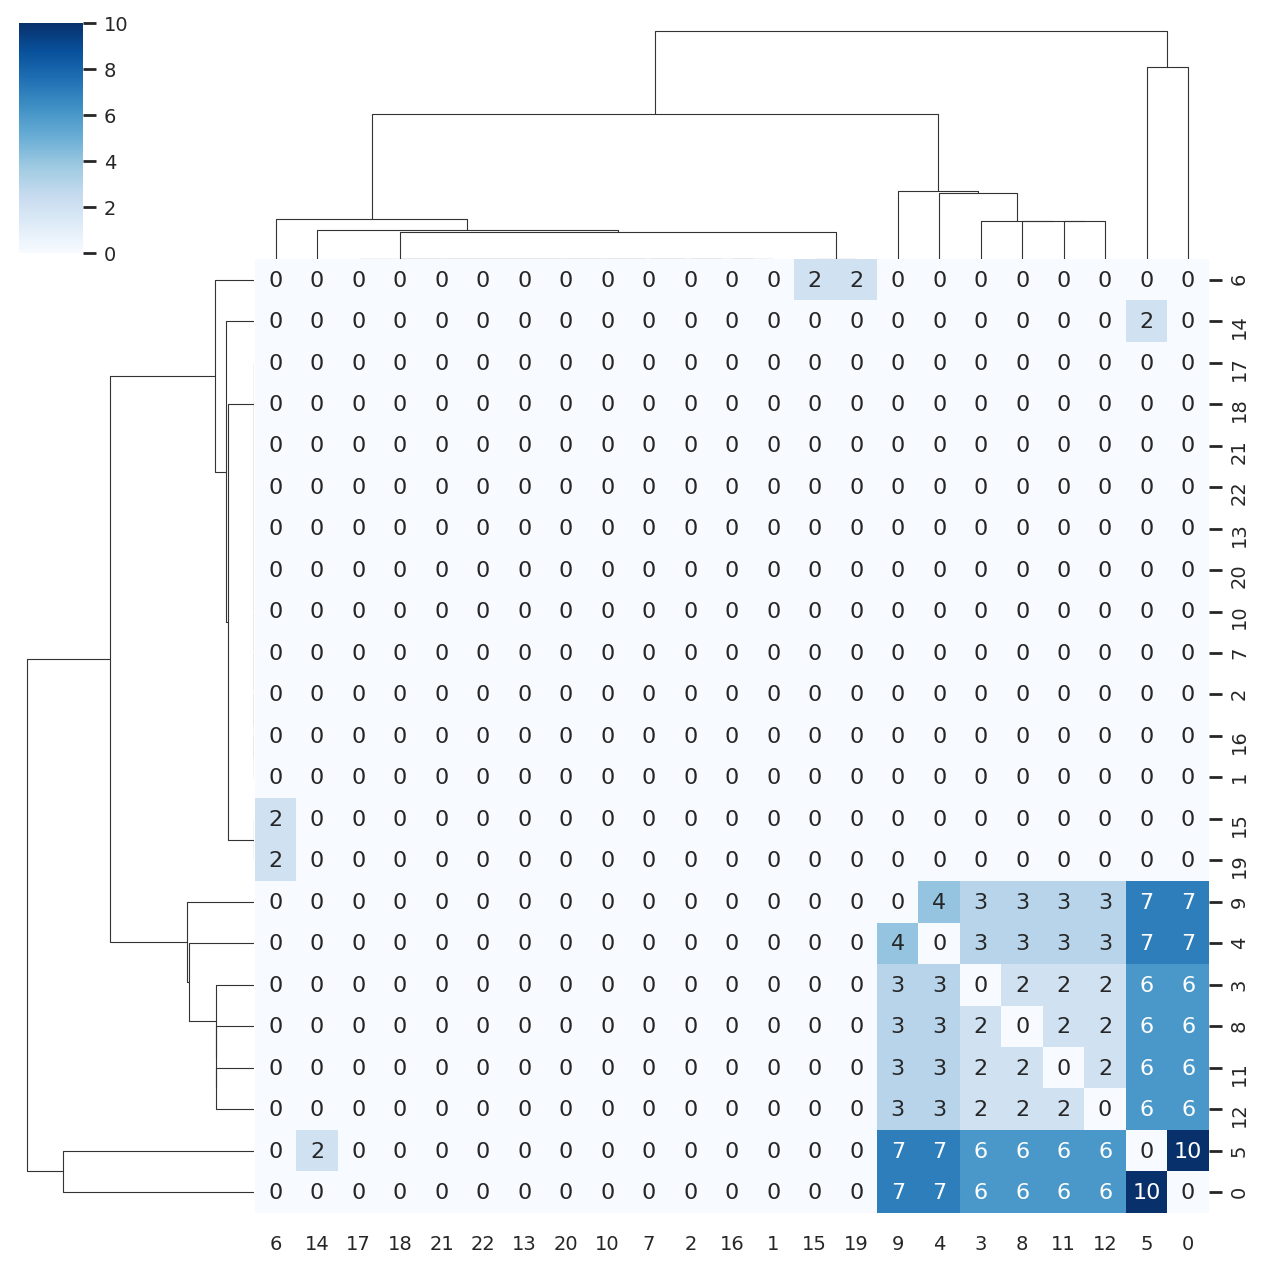

In [41]:
import seaborn as sns
sns.set(font_scale=.8)
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden',
                     weighted_overlap = True, as_heatmap = True,
                     # seaborn clustermap kwargs
                     cmap = 'Blues', annot = True, figsize=(8,8), annot_kws={"size": 10})

In [42]:
# first make a concatenated group
adata.obs['sampleid_leiden'] = [s +'_' + l for s, l in zip(adata.obs['sampleid'], adata.obs['leiden'])]
new_adata = ddl.tl.vj_usage_pca(adata, groupby = 'sampleid_leiden',
                    mode = 'B', # because B cells, use abT and gdT for alpha-beta and gamma-delta T cells respectively
                    transfer_mapping = ['sampleid', 'leiden'], # this transfers the sample_id and leiden values separately. if not provided, only sample_id_leiden is transferred.
                    n_comps = 5 # 5 because the example is more here. the default is set at 30
                   )
new_adata

Computing PCA for V/J gene usage
computing PCA
    with n_comps=5
    finished (0:00:00)
 finished: Returned AnnData: 
   'obsm', X_pca for V/J gene usage (0:00:00)


AnnData object with n_obs × n_vars = 7 × 138
    obs: 'cell_type', 'cell_count', 'sampleid', 'leiden'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

... storing 'sampleid' as categorical
... storing 'leiden' as categorical


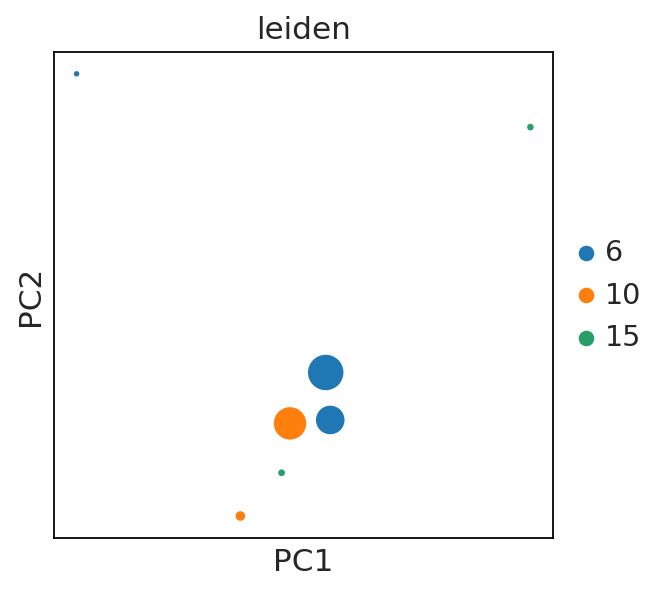

In [43]:
sc.set_figure_params()
sc.pl.pca(new_adata, color = 'leiden', size = new_adata.obs['cell_count'])
# each dot is a `sample_id_leiden`. Check the .obs

In [44]:
vdj2, adata2 = ddl.pp.check_contigs(vdj, adata, productive_only = False)

Filtering contigs


Preparing data: 7357it [00:03, 2359.78it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 3158/3158 [00:23<00:00, 131.85it/s]                                                      


Initializing Dandelion object
Transferring network
 finished: updated `.obs` with `.metadata`
 (0:00:00)
 finished: Returning Dandelion and AnnData objects: 
 (0:00:32)


In [45]:
ddl.tl.productive_ratio(adata2, vdj2, groupby = 'leiden', locus = 'IGK')

Tabulating productive ratio
 finished: Updated AnnData: 
   'uns', productive_ratio (0:00:00)


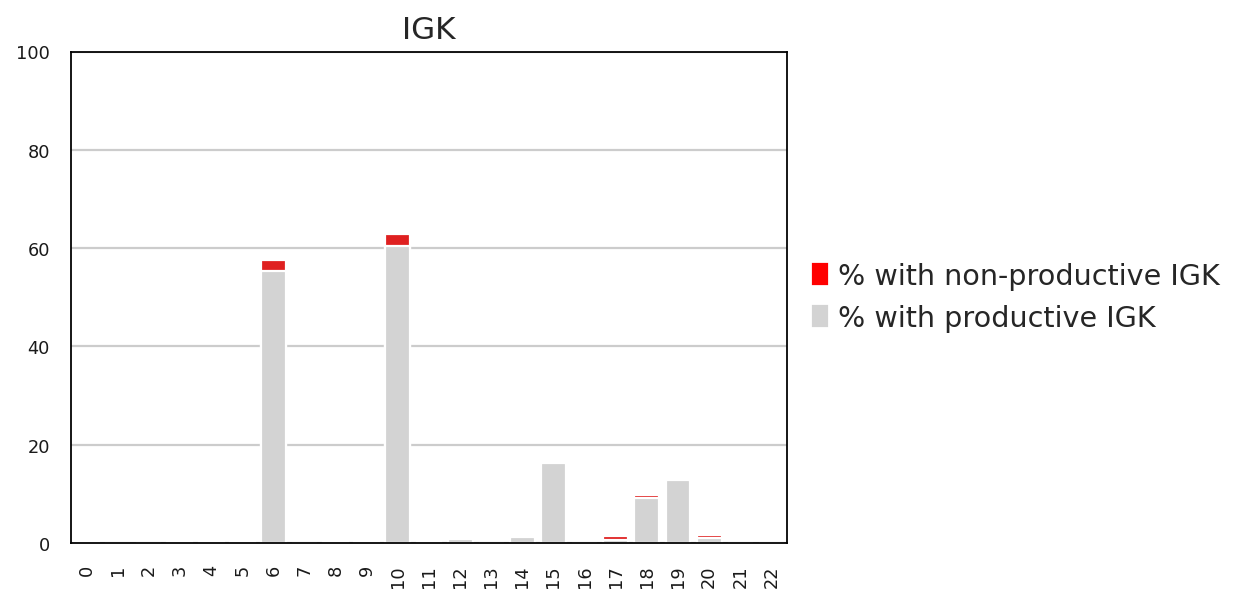

In [46]:
ddl.pl.productive_ratio(adata2, palette = ['red', 'lightgrey'])
plt.tight_layout()
# plt.savefig('plot.pdf')